## Course Announcements:

- A3 due Sunday (11:59 PM)
- Reminder: Courtesy Rule is in effect

## Project Notes
- You **can** adapt/change/edit your question, hypothesis, dataset
- There is an outline file for your final project: https://github.com/COGS108/Projects/blob/master/FinalProject.ipynb
- We're here to help guide you, but work with and discuss with your team first
- In data science, it's up to the team to make decisions
    - make them, defend them, consider & include their limitations
- For EDA, not all plots have to be 'presentation quality'
    - for the three that we grade (the ones that show your results), consider best visualization practices discussed 
        - this can take longer than expected
- We'll discuss submission in detail later

# Text Analysis

- **Sentiment Analysis**
    - tokenization
    - stop words
    - stemming
- **TF-IDF**
    - Bag of Words
    - term frequency
    - inverse document frequency
- Tools: `nltk`

#### Reminder: **Natural Language Processing** is a whole field of study.

Like most topics in this course, there are many courses solely focused on the appropriate analysis of text. We'll cover the general concepts in this course, but know you're missing lots of important details.

## Natural Language Toolkit (`nltk`)

For more details on using the functionality within this package, check out the [NLTK Book](http://www.nltk.org/book/).

0. Preface
1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. Writing Structured Programs
5. Categorizing and Tagging Words 
6. Learning to Classify Text
7. Extracting Information from Text
8. Analyzing Sentence Structure
9. Building Feature Based Grammars
10. Analyzing the Meaning of Sentences 
11. Managing Linguistic Data
12. Afterword: Facing the Language Challenge

In [1]:
#import natural language toolkit
import nltk

[VADER](https://github.com/cjhutto/vaderSentiment) is a particularly helpful tool/lexicon when working with sentiments expressed in social media (tweets, online reviews, etc.)

Its functionality is available through `nltk`, so we'll download the vader lexicon for use later in this notebook.

In [2]:
# get lexicon we'll be working with today
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shannonellis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## The Data

In [88]:
# pandas and matplotlib setup
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 16})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [89]:
# read in feedback dataset
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Sp19.csv')
df.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments"
1,I enjoy learning how to use pandas through the...,NaN,somewhat easier,about the same,attend occasionally,"Assignments, Group Project"
2,No attendance,NaN,about as difficult,about the same,attend occasionally,"Assignments, Piazza"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza"
5,NaN,NaN,about as difficult,about the same,attend occasionally,"Lecture, Section - Workbooks, Assignments, Gro..."


## Describe & Explore

We'll quickly describe and explore the data to see what information we have before moving on to Text Analysis.

### Data Considerations

- duplicate responses?
- PIDs for individuals in the class (typos?)
- missingness?
- reflect reality?

In [90]:
# information about rows and columns
df.shape

(384, 6)

Note: There are 826 students enrolled in COGS108 this quarter. So, we're looking at the opinions of less than half of the students in this class.

### Missingness

In [91]:
# how many nonresponses
df.isnull().sum()

enjoyed_most          58
enjoyed_least         78
difficulty             0
time_spent             0
section_attendance     8
helpful_materials      0
dtype: int64

We see that there are more nonresponses in the `enjoyed_least` category than the `enjoyed_most` category. So, more people left what they enjoyed least blank than they did what they enjoyed most.

In [92]:
# number of people who didn't respond to either
df[df['enjoyed_most'].isnull() & df['enjoyed_least'].isnull()].shape

(50, 6)

This means that there are only 8 people who mentioned what they like least but didn't have a most. We may consider these people's responses to be of high importance. This suggests they're liking COGS108 less than others...

In [93]:
# number of people who didn't respond to either
check_least = df[df['enjoyed_most'].isnull() & df['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['assigned groups because I was looking forward to working with my friends',
 'Coding....',
 'The professor focus too much on statistics and spend insufficient time in coding',
 'What I have liked the least of COGS108 is that I have had trouble with the assignments since I came in with a matlab background and not a python background. So basically not knowing the language has been tough. ',
 'Assigned groups. I enrolled in the class with a group of friends under the assumption that we’d get to work together as in previous iterations of the course.',
 'The professor talked a bit fast',
 "I think lectures are not organized and they are extremely confusing. It would help if they were catered in a more content / topic based way. The homeworks are extremely difficult if you don't have python experience ",
 'Not being able to work with friends on the group project. Trying to work with chosen groupmates who do not care about this class.']

Missing data causes a problem in `nltk`, so we either get rid of individuals who didn't respond to both, or we can replace their missing data with 'No response', knowing that this text will be included in the analysis now.

In [94]:
# fill NAs with string 'No response'
df['enjoyed_most'].fillna('No response', inplace=True)
df['enjoyed_least'].fillna('No response', inplace=True)
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments"
1,I enjoy learning how to use pandas through the...,No response,somewhat easier,about the same,attend occasionally,"Assignments, Group Project"
2,No attendance,No response,about as difficult,about the same,attend occasionally,"Assignments, Piazza"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza"


### Exploratory Plots

These can give us a quick idea of students' thoughts on the course.

- Relative Difficulty
- Time Spent
- Section Attendance

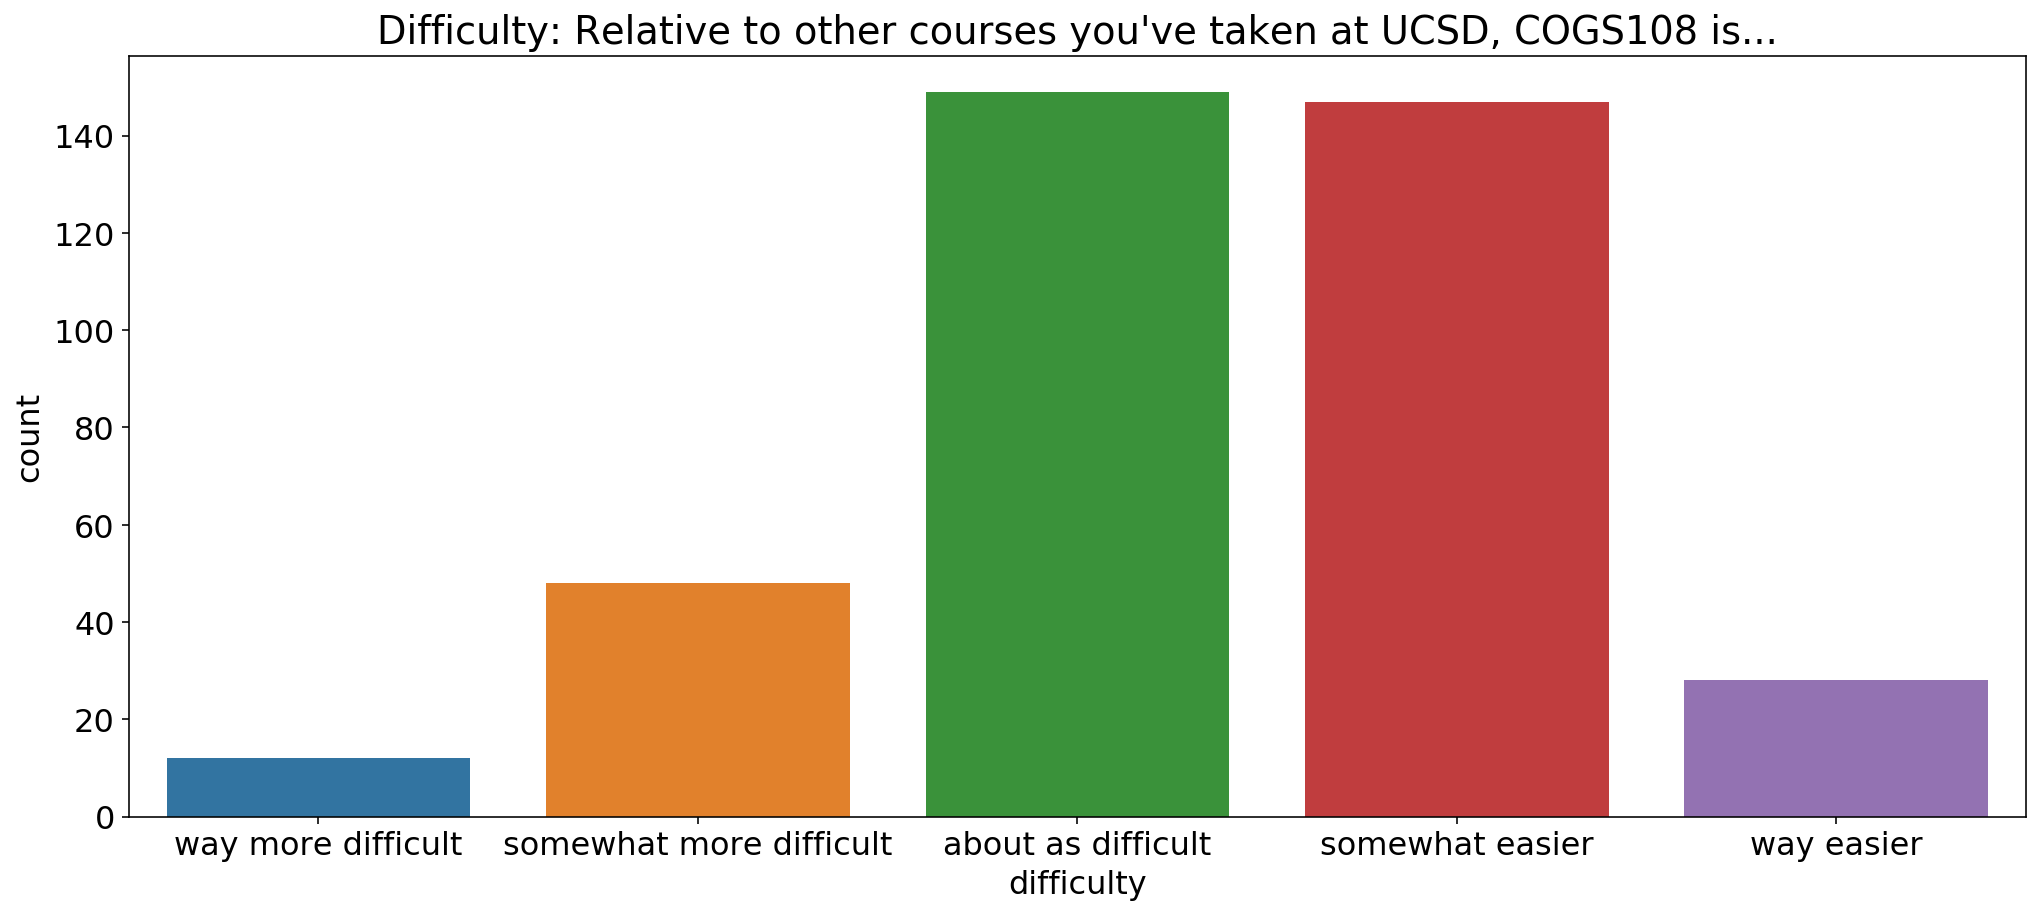

In [31]:
sns.countplot(df['difficulty'],
             order=['way more difficult','somewhat more difficult','about as difficult',
                    'somewhat easier','way easier'])
plt.title('Difficulty: Relative to other courses you\'ve taken at UCSD, COGS108 is...');

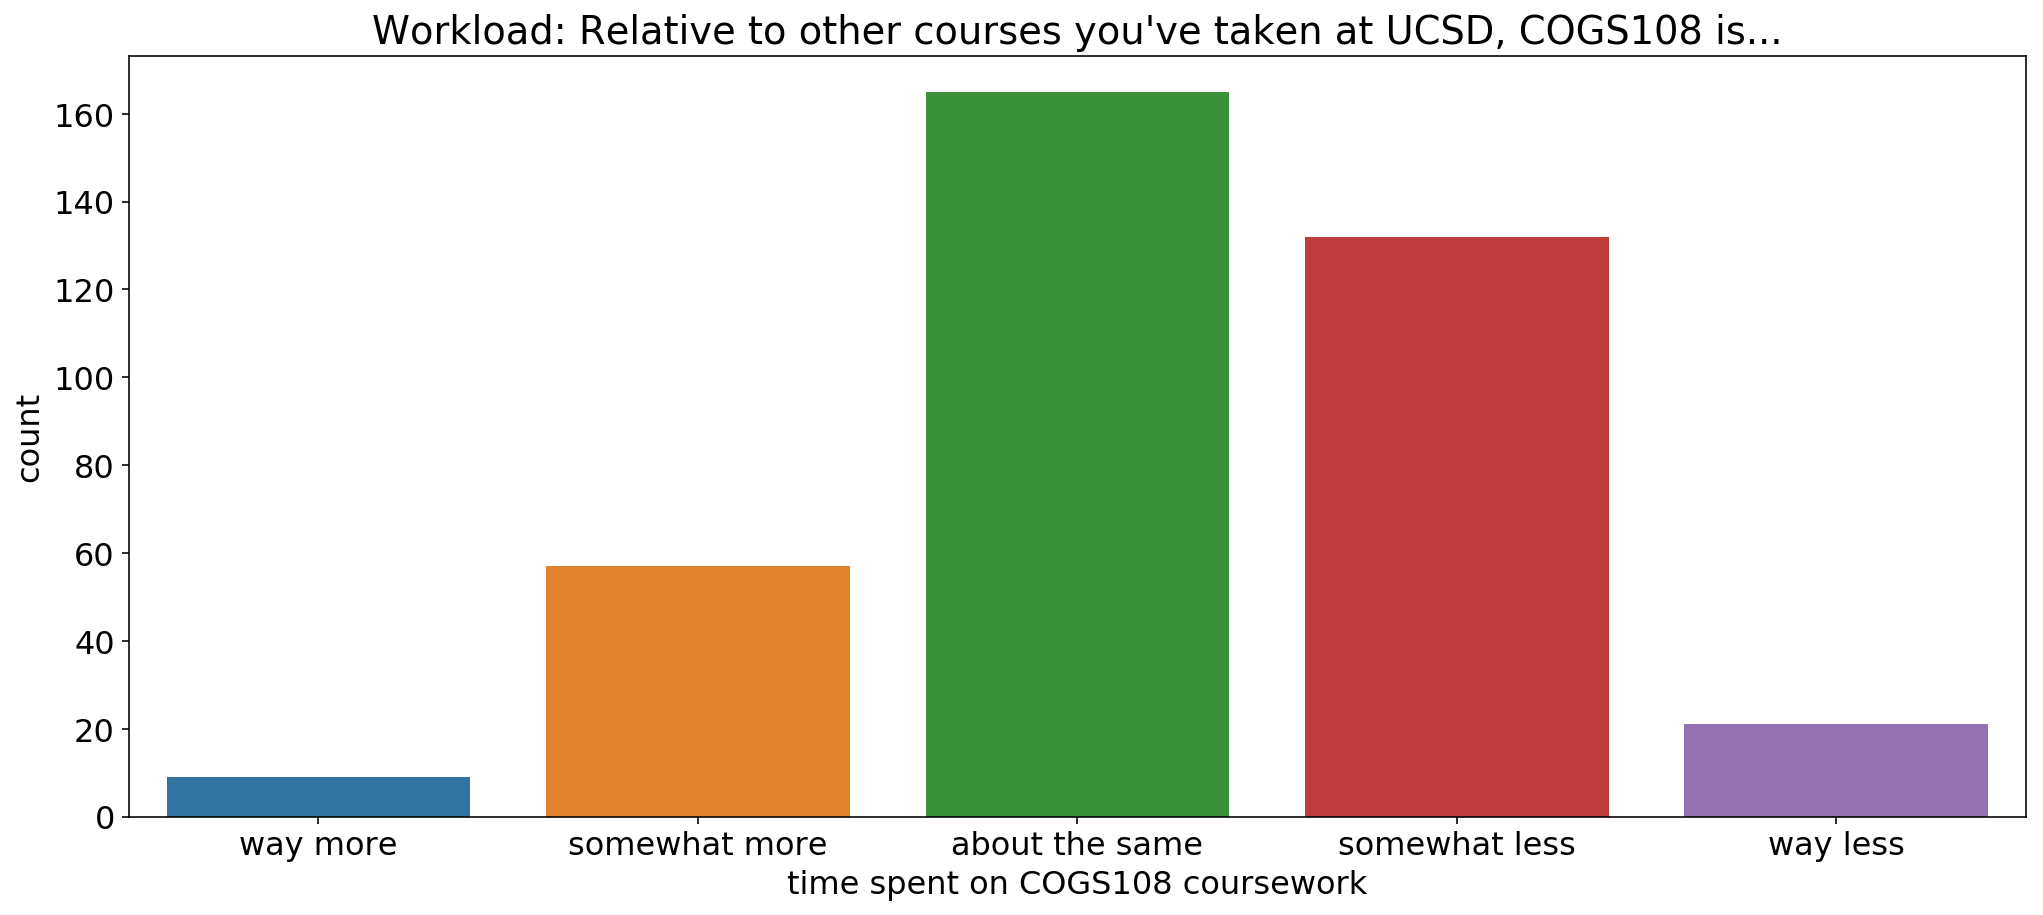

In [32]:
sns.countplot(df['time_spent'],
             order=['way more','somewhat more','about the same',
                    'somewhat less','way less'])
plt.title('Workload: Relative to other courses you\'ve taken at UCSD, COGS108 is...')
plt.xlabel('time spent on COGS108 coursework');

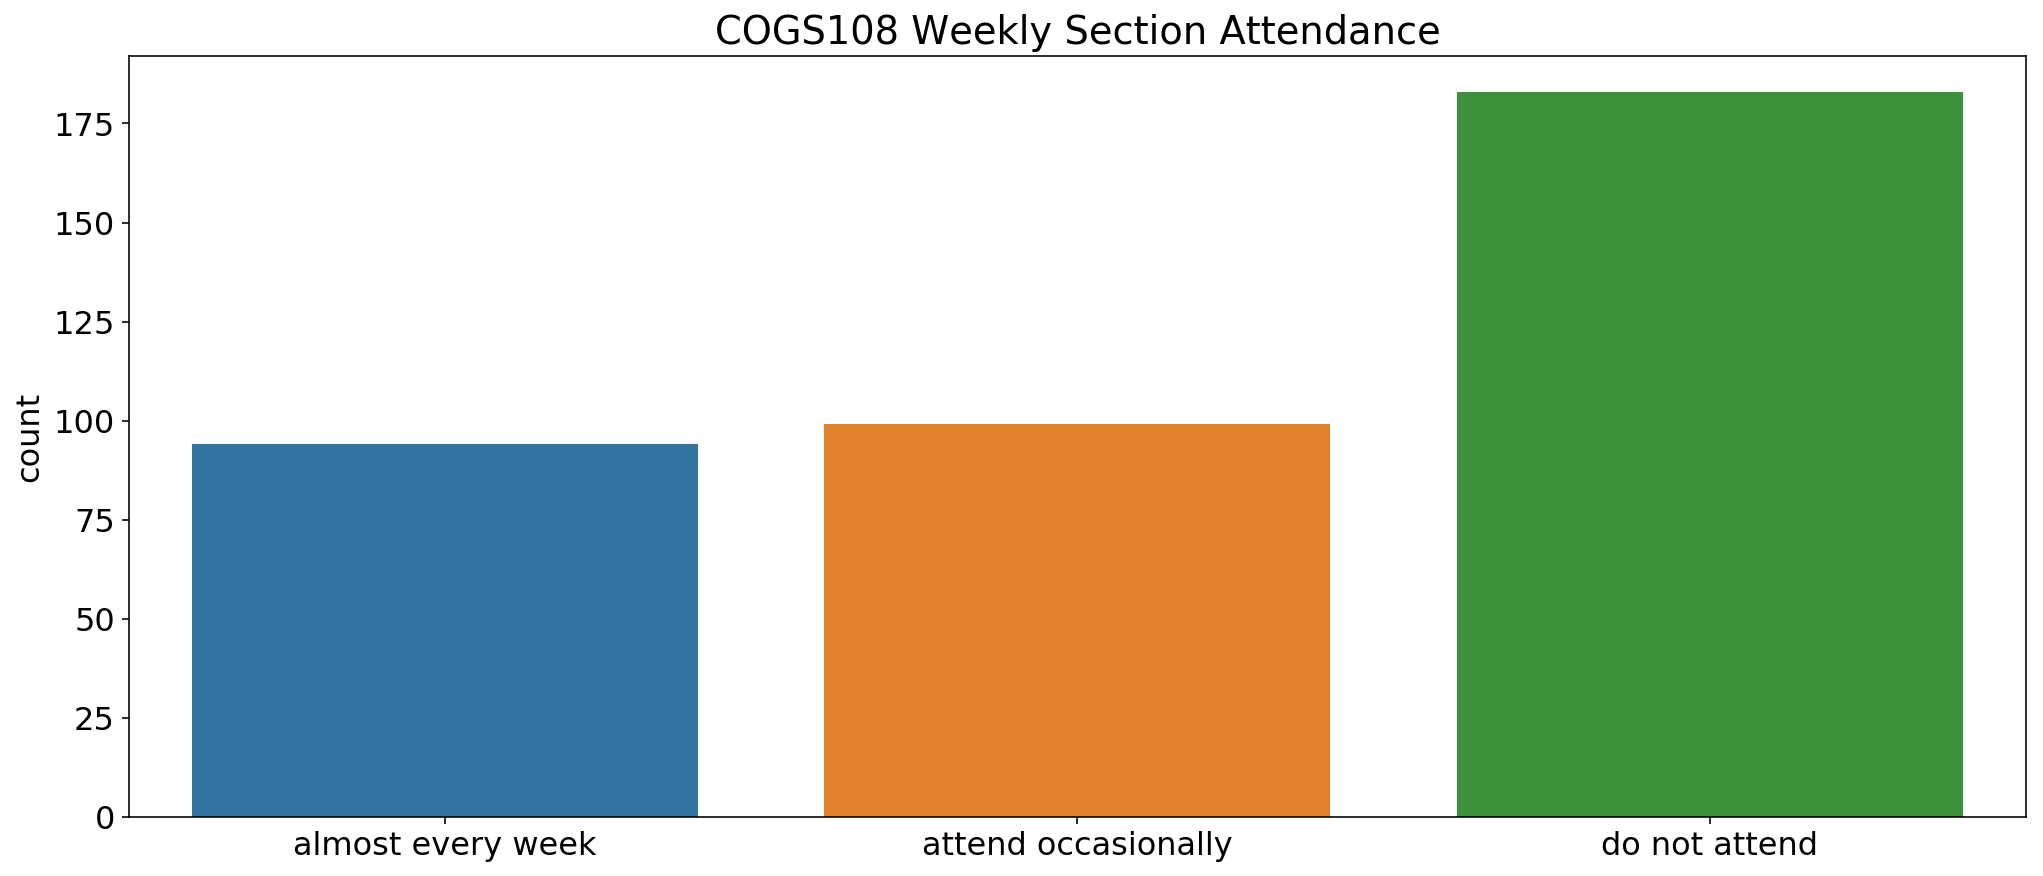

In [33]:
sns.countplot(df['section_attendance'])
plt.title('COGS108 Weekly Section Attendance')
plt.xlabel('');

## Quick checks: Words of interest



In [37]:
def check_word_freq(word):
    """checks for frequenccy of word specified in most and least enjoyed responses"""
    most = df['enjoyed_most'].str.lower().str.contains(word).sum()/df['enjoyed_most'].notnull().sum()
    least = df['enjoyed_least'].str.lower().str.contains(word).sum()/df['enjoyed_least'].notnull().sum()
    
    out = pd.DataFrame({'most_freq': [most], 'least_freq': [least]})
    return out

#### Assignment

In [38]:
## check for assignment
check_word_freq('assignment')

,most_freq,least_freq
0,0.255208,0.117188


In [9]:
# can check helpfulness
df['helpful_materials'].str.lower().str.contains('assignments').sum()/df['helpful_materials'].notnull().sum()

0.8333333333333334

#### Group Project

In [7]:
## check for project in free text
check_word_freq('project')

,most_freq,least_freq
0,0.125767,0.24183


In [8]:
## check for group in free text
check_word_freq('group')

,most_freq,least_freq
0,0.070552,0.245098


In [11]:
# can check helpfulness
df['helpful_materials'].str.lower().str.contains('group project').sum()/df['helpful_materials'].notnull().sum()

0.3151041666666667

## Sentiment Analysis

We get a quick snapshot of what's going on in COGS108, but we really want to understand the details. To do this, analyzing the sentiment of the text is a good next step.

#### Step 1: Tokenization

Tokenization is the first step in analyzing text. 

1. Aquire text of interest
2. Break text down (tokenize) into smaller chunks (i.e. words, bigrams, sentences, etc.)

A **token** is a single entity - think of it as a building block of language.

### Tokenization Example

Here we demonstrate what a tokenized single response looks like.

In [39]:
## import word tokenizer
from nltk.tokenize import word_tokenize

In [40]:
tokenized_word=word_tokenize(df.loc[1,'enjoyed_most'])
print(tokenized_word)

['I', 'enjoy', 'learning', 'how', 'to', 'use', 'pandas', 'through', 'the', 'assignments', 'and', 'the', 'group', 'project', 'to', 'do', 'data', 'wrangling', 'and', 'cleaning', '.']


#### Tokenize COGS108 data

Using that concept we'll tokenize the words in the enjoyed_most and `enjoyed_least` columns for the data in our COGS108 data.

In [42]:
# tokenize most and least responses
df['most_token'] = df['enjoyed_most'].apply(word_tokenize) 
df['least_token'] = df['enjoyed_least'].apply(word_tokenize) 
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials,most_token,least_token
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments","[No, tests, ,, project, based, class, ,, optio...","[Group, projects, can, be, rough, ,, especiall..."
1,I enjoy learning how to use pandas through the...,No response,somewhat easier,about the same,attend occasionally,"Assignments, Group Project","[I, enjoy, learning, how, to, use, pandas, thr...","[No, response]"
2,No attendance,No response,about as difficult,about the same,attend occasionally,"Assignments, Piazza","[No, attendance]","[No, response]"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments","[Topics, about, how, to, handle, several, Pyth...","[nothing, special]"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza","[I, like, the, assignments, ., They, 're, fun,...","[Nothing, !]"


#### Step 2: Stop Words

**Stop words** are words that are of less interest to your analysis. 

For example, you wouldn't expect the following words to be important: is, am, are, this, a, an, the, etc.

By removing stopwords, you can lower the computational burden, focusing on only the words of interest.

To do so in `nltk`, you need to create a list of stopwords and filter them from your tokens.


In [43]:
# import stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

# look at stop words
print(stop_words)

{'over', 'isn', 're', 'most', 'up', 'y', 'who', 'we', 'some', 'there', 'ain', 'whom', "couldn't", "hasn't", 'for', "you'd", 'weren', 'itself', 'that', 'any', 'few', 'myself', 'under', "aren't", 'so', 'ours', 'more', "won't", 'is', 'm', 'do', 'this', "should've", "she's", 'mustn', "hadn't", 'their', 'against', 'once', 'very', 'it', 'don', "mustn't", 'wouldn', 'and', 'where', 'about', 'won', 've', 'again', 'as', 'am', 'does', 'has', 'being', 'an', 'these', 'which', 'all', 'should', "weren't", 'his', 'by', 'how', "shouldn't", 'further', 'ma', 'the', 'herself', 'aren', 'a', 'then', 'same', 'such', 'o', 'himself', 'yourself', 'in', 'during', 'mightn', "mightn't", 'doing', 'why', 'are', 'own', 'll', 'doesn', 'did', 'be', 'couldn', 'he', 'because', 'down', 'had', 'no', 'other', 'hadn', 'with', 'my', 'him', 's', 'theirs', 'into', 'hers', 'both', 'didn', 'now', 'will', 'if', "you've", "you'll", 'yourselves', 'shan', 'ourselves', 'me', 'not', 'or', 'until', 'haven', "needn't", 'needn', "shan't",

### Stop Words Example

Here we compare a sentence after tokenization to one that has been tokenized _and had stop words removed_.

In [44]:
# example of removing stop words
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['I', 'enjoy', 'learning', 'how', 'to', 'use', 'pandas', 'through', 'the', 'assignments', 'and', 'the', 'group', 'project', 'to', 'do', 'data', 'wrangling', 'and', 'cleaning', '.']
Filterd Sentence: ['I', 'enjoy', 'learning', 'use', 'pandas', 'assignments', 'group', 'project', 'data', 'wrangling', 'cleaning', '.']


#### Remove Stop Words: COGS108 data

Using that idea, we can go ahead and remove stop words from our tokenized most and least liked tokenized data.

In [45]:
# remove stop words
df['most_stop'] = df['most_token'].apply(lambda x: [item for item in x if item not in stop_words])
df['least_stop'] = df['least_token'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials,most_token,least_token,most_stop,least_stop
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments","[No, tests, ,, project, based, class, ,, optio...","[Group, projects, can, be, rough, ,, especiall...","[No, tests, ,, project, based, class, ,, optio...","[Group, projects, rough, ,, especially, beginn..."
1,I enjoy learning how to use pandas through the...,No response,somewhat easier,about the same,attend occasionally,"Assignments, Group Project","[I, enjoy, learning, how, to, use, pandas, thr...","[No, response]","[I, enjoy, learning, use, pandas, assignments,...","[No, response]"
2,No attendance,No response,about as difficult,about the same,attend occasionally,"Assignments, Piazza","[No, attendance]","[No, response]","[No, attendance]","[No, response]"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments","[Topics, about, how, to, handle, several, Pyth...","[nothing, special]","[Topics, handle, several, Python, tools]","[nothing, special]"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza","[I, like, the, assignments, ., They, 're, fun,...","[Nothing, !]","[I, like, assignments, ., They, 're, fun, good...","[Nothing, !]"


#### Step 3: Lexicon Normalization (**Stemming**)

In language, many different words come from the same root word. 

For example, "intersecton", "intersecting", "intersects", and "intersected" are all related to the common root word - "intersect".

**Stemming** is how linguistic normalization occurs - it reduces words to their root words (and chops off additional things like 'ing') - all of the above words would be reduced to their common stem "intersect."






### Stemming Example

After tokenization and removing stop words, we can get the stem for all tokens (words) in our dataset.

In [46]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['I', 'enjoy', 'learning', 'use', 'pandas', 'assignments', 'group', 'project', 'data', 'wrangling', 'cleaning', '.']
Stemmed Sentence: ['I', 'enjoy', 'learn', 'use', 'panda', 'assign', 'group', 'project', 'data', 'wrangl', 'clean', '.']


#### Stemming: COGS108 data

Here, we obtain the stem (root word) for all tokens in our dataset.

In [47]:
df['most_stem'] = df['most_stop'].apply(lambda x: [ps.stem(y) for y in x])
df['least_stem'] = df['least_stop'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials,most_token,least_token,most_stop,least_stop,most_stem,least_stem
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments","[No, tests, ,, project, based, class, ,, optio...","[Group, projects, can, be, rough, ,, especiall...","[No, tests, ,, project, based, class, ,, optio...","[Group, projects, rough, ,, especially, beginn...","[No, test, ,, project, base, class, ,, option,...","[group, project, rough, ,, especi, begin, sect..."
1,I enjoy learning how to use pandas through the...,No response,somewhat easier,about the same,attend occasionally,"Assignments, Group Project","[I, enjoy, learning, how, to, use, pandas, thr...","[No, response]","[I, enjoy, learning, use, pandas, assignments,...","[No, response]","[I, enjoy, learn, use, panda, assign, group, p...","[No, respons]"
2,No attendance,No response,about as difficult,about the same,attend occasionally,"Assignments, Piazza","[No, attendance]","[No, response]","[No, attendance]","[No, response]","[No, attend]","[No, respons]"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments","[Topics, about, how, to, handle, several, Pyth...","[nothing, special]","[Topics, handle, several, Python, tools]","[nothing, special]","[topic, handl, sever, python, tool]","[noth, special]"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza","[I, like, the, assignments, ., They, 're, fun,...","[Nothing, !]","[I, like, assignments, ., They, 're, fun, good...","[Nothing, !]","[I, like, assign, ., they, 're, fun, good, dif...","[noth, !]"


#### Step 4: Frequency Distribution

It can be helpful to get a sense of which words are most frequent in our dataset.

In [56]:
# get series of all most and least liked words after stemming
# note that "No Response" is still being included in the analysis
most = df['most_stop'].apply(pd.Series).stack()
least = df['least_stem'].apply(pd.Series).stack()

`FreqDist` calculates the frequency of each word in the text and we can plot the most frequent words.

In [57]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_most = FreqDist(most)
fdist_least = FreqDist(least)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_most[punc]
    del fdist_least[punc]

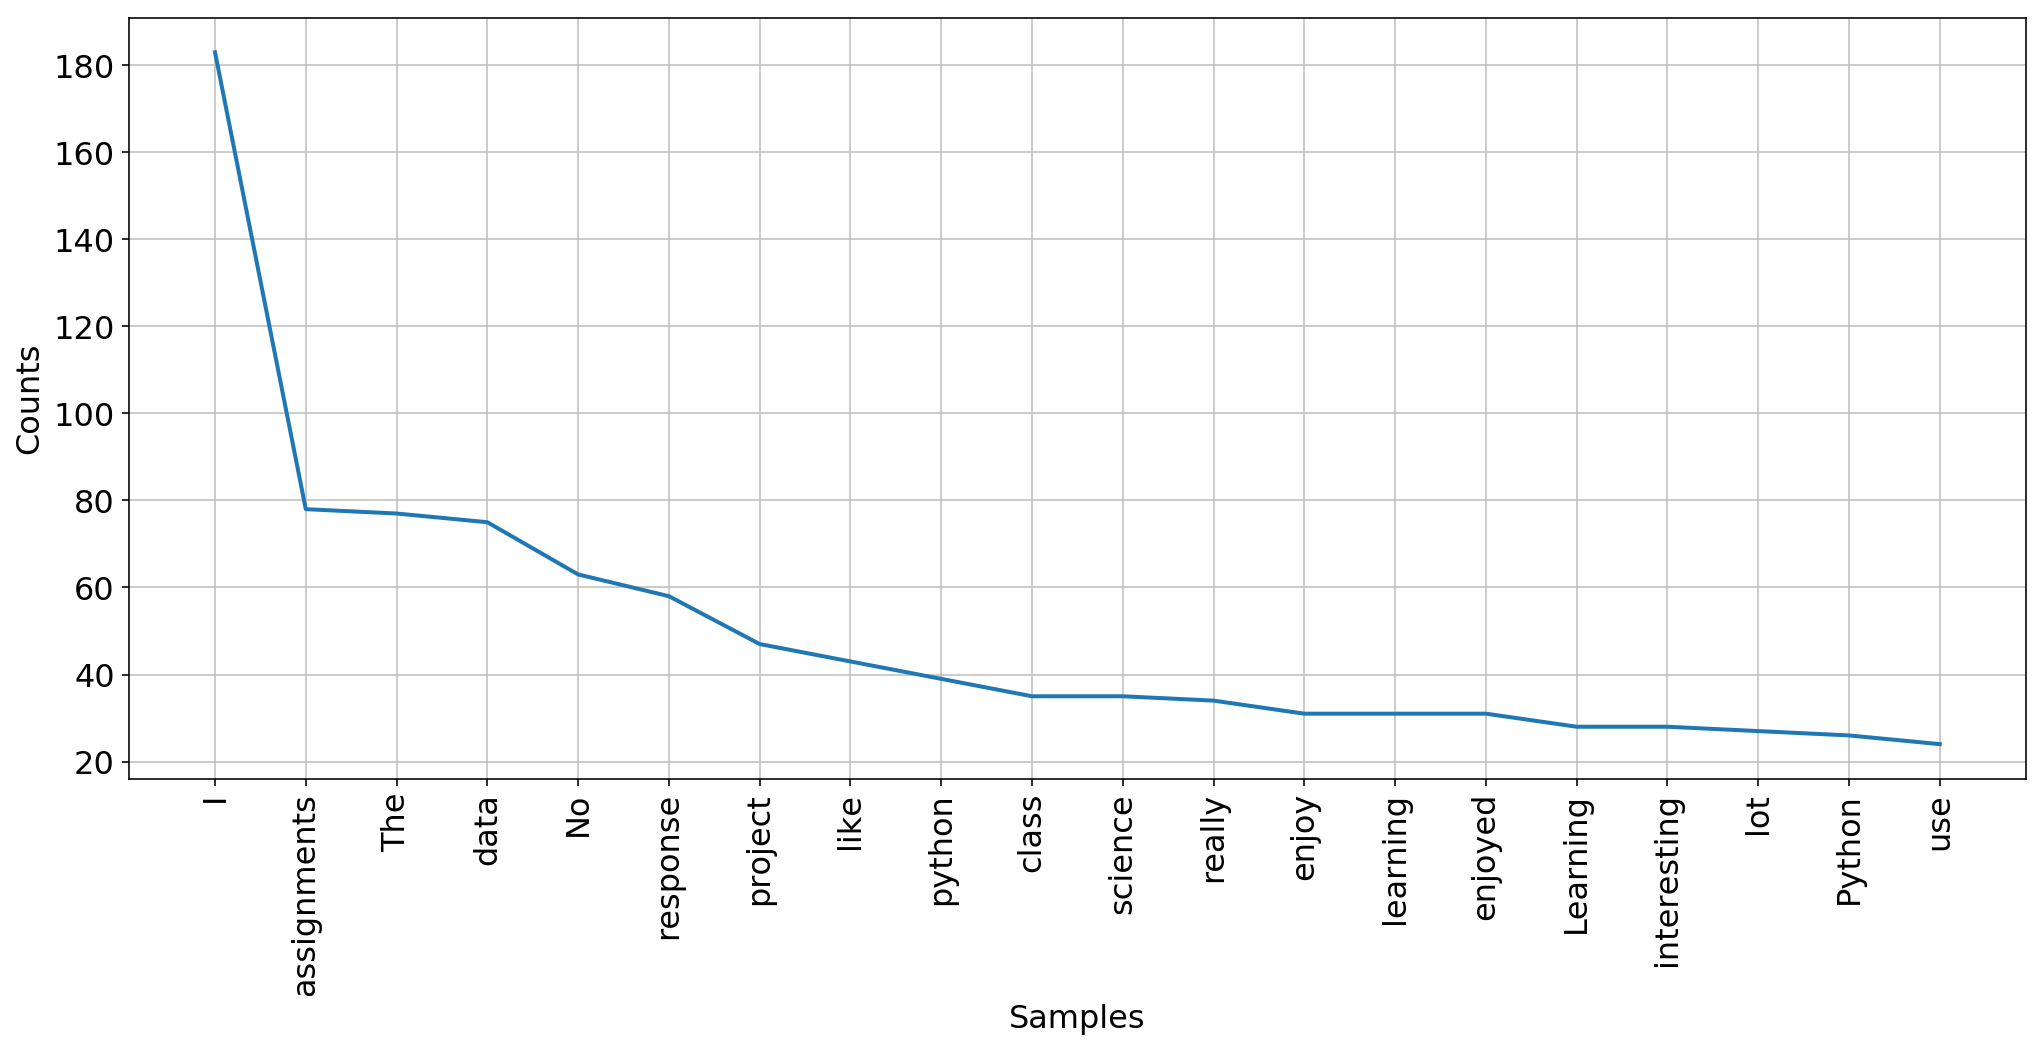

In [58]:
# Frequency Distribution Plot - top 20
# for words in what students like most
fdist_most.plot(20,cumulative=False)

# Clicker Question

Which word is least common in responses about what students like most about COGS108?

A) I  | B) assignments | C) use | D) lot | E) can't be determined from this

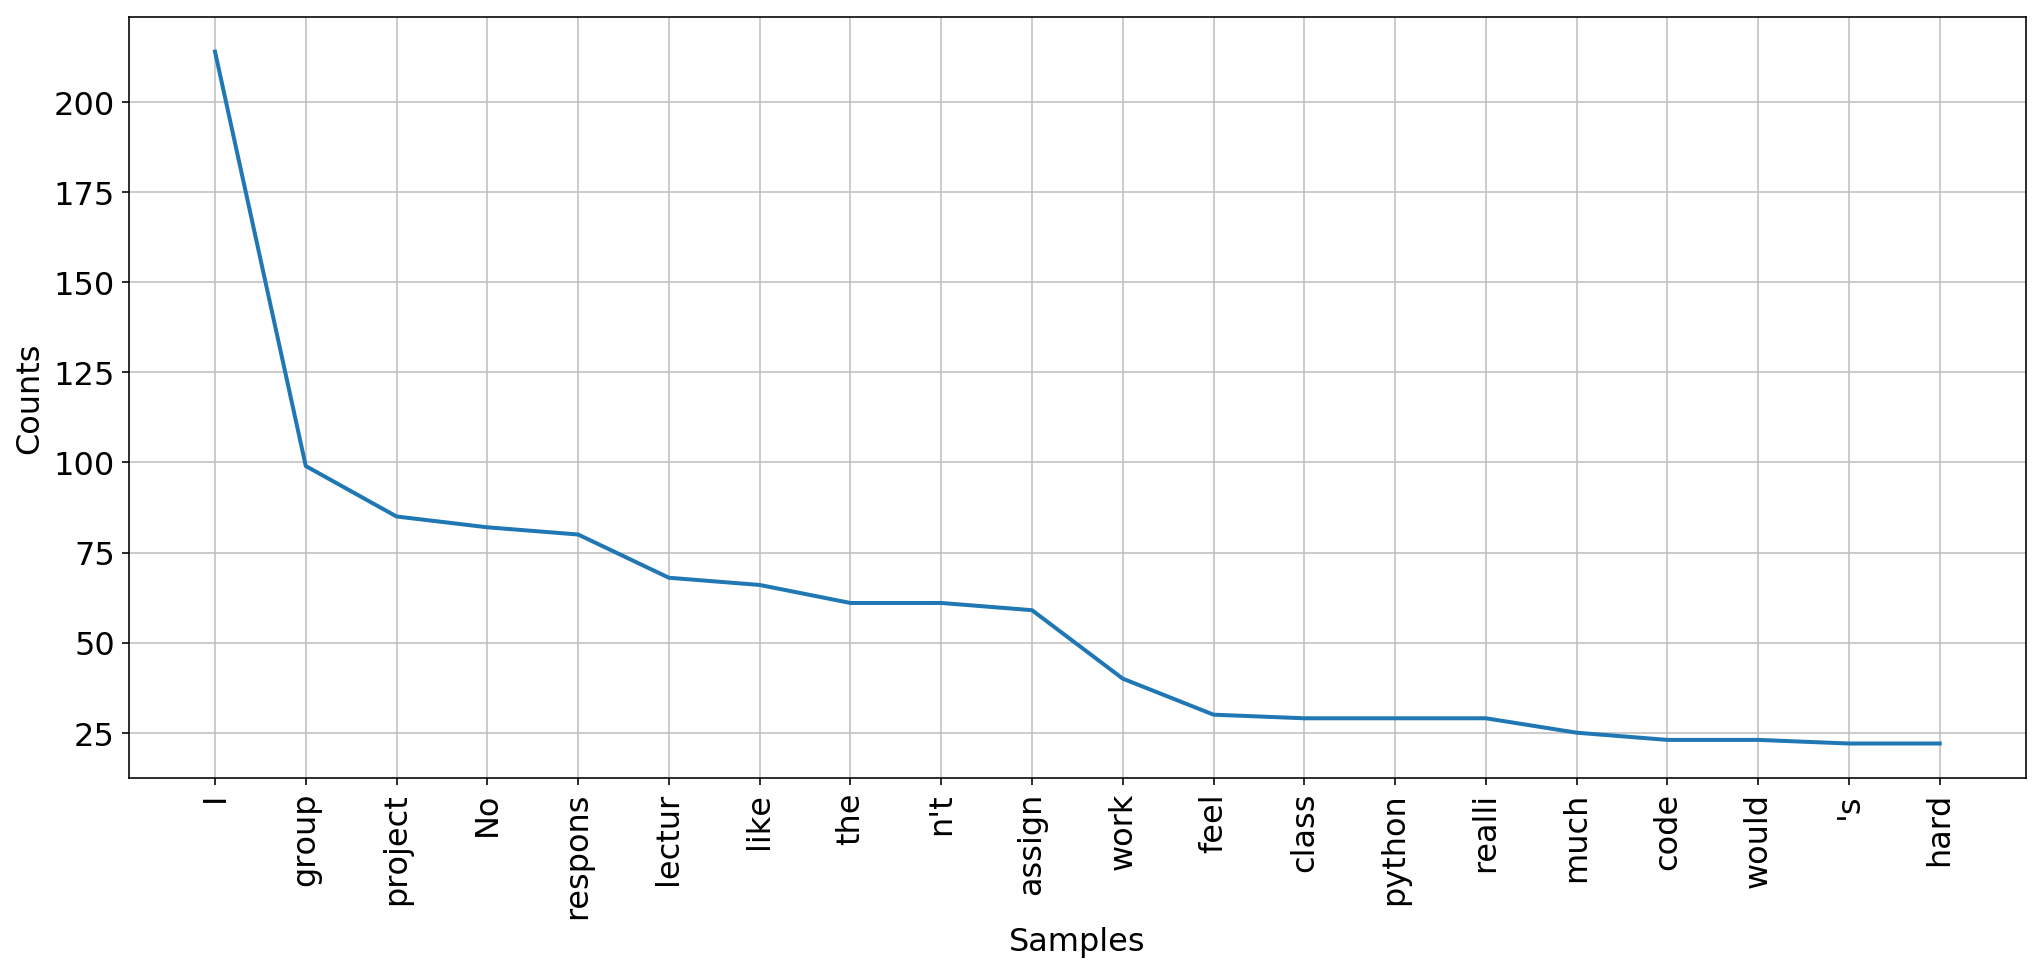

In [59]:
# Frequency Distribution Plot
# for what students like least
fdist_least.plot(20,cumulative=False,)

#### Step 5: Sentiment Analysis!

**Sentiment Analysis** quantifies the content, idea, beliefs and opinions conveyed in text. 

Two general approaches:

1. **Lexicon-based** - count number of words in a text belonging to each sentiment (positive, negative, happy, angry, etc.)
2. **Machine learning-based** - develop a classification model on pre-labeled data



### Sentiment Example

To get a measure of overall sentiment in our text, we'll compare our text to the VADER lexicon.

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

VADER handles:

- capitalization (great vs GREAT) & punctuation (exclamation makes more positive!)
- emojis and emoticons
- degree modifiers (extremely good vs. marginally good)
- contractions and conjunctions (but signals shift)

In [61]:
analyser.polarity_scores("The class is super cool.")

{'compound': 0.7351, 'neg': 0.0, 'neu': 0.326, 'pos': 0.674}

In [62]:
analyser.polarity_scores("The class is not super cool.")

{'compound': -0.6259, 'neg': 0.561, 'neu': 0.439, 'pos': 0.0}

In [63]:
analyser.polarity_scores("The class is NOT super cool!")

{'compound': -0.6597, 'neg': 0.574, 'neu': 0.426, 'pos': 0.0}

`pos` + `neg` + `neu` = 1

**`compound`** score - metric that calculates sum of all the lexicon ratings and normalizes between -1(most extreme negative) and +1 (most extreme positive)
- positive: `compound` >= 0.05 
- neutral: -0.05 < `compound` < 0.05
- negative : `compound` <= -0.05

# Clicker Question

Given the sentence "I love bike riding through the city every day!", what would you expect its `compound` score to be? 
- A) -1
- B) -0.7
- C) 0
- D) 0.7
- E) 1

In [64]:
analyser.polarity_scores("")

{'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

#### Sentiment Analysis: COGS108 data

Here, we will calculate the sentiment of each most liked and least liked student response from the survey.

In [65]:
# get list of the 'sentences' (responses) from each individual
most_list = list(df['enjoyed_most'].values)
least_list = list(df['enjoyed_least'].values)

In [66]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [67]:
# get sentiment measures
least_sentiments = get_sentiments(least_list)
most_sentiments = get_sentiments(most_list)

#### Sentiment Analysis: COGS108 data output

After calculating the sentiment of each response, we can look at the output of each.

In [68]:
# take a look at the output
least_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,-0.2960,0.155,0.845,0.0,"Group projects can be rough, especially the be..."
1,-0.2960,0.688,0.312,0.0,No response
2,-0.2960,0.688,0.312,0.0,No response
3,-0.3089,0.693,0.307,0.0,nothing special
4,0.0000,0.000,1.000,0.0,Nothing!
5,-0.2960,0.688,0.312,0.0,No response
6,0.0000,0.000,1.000,0.0,Rushed past a lot of coding syntax. Too much e...
7,0.0000,0.000,1.000,0.0,Sometimes the class is too slow for case study
8,0.0000,0.000,1.000,0.0,N/a
9,-0.3182,0.173,0.827,0.0,Having to do a lot of research and googling; t...


In [69]:
# take a look at the output
most_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,-0.2960,0.268,0.732,0.000,"No tests, project based class, optional lectur..."
1,0.4939,0.000,0.849,0.151,I enjoy learning how to use pandas through the...
2,-0.2960,0.688,0.312,0.000,No attendance
3,0.0000,0.000,1.000,0.000,Topics about how to handle several Python tools
4,0.9874,0.075,0.541,0.384,I like the assignments. They're fun and have a...
5,-0.2960,0.688,0.312,0.000,No response
6,0.0000,0.000,1.000,0.000,Learning Python & Extracting Data from websites
7,0.0000,0.000,1.000,0.000,Learning about Jupiter notebook and different ...
8,-0.4019,0.278,0.722,0.000,Detailed examples of working through data scie...
9,0.0000,0.000,1.000,0.000,Brainstorming all the different variables that...


#### Let's deal with those `No response` values

We've left them in there long enough. Let's remove the 'No response' values before we look at any overall patterns.

In [71]:
most_sentiments = most_sentiments[most_sentiments['sentence'] != 'No response']
least_sentiments = least_sentiments[least_sentiments['sentence'] != 'No response']

#### Sentiment Analysis: COGS108 data - `describe`

To get an overall sense of the values stored in each of these dataframes, we can use `describe`.

In [72]:
most_sentiments.describe()

,compound,neg,neu,pos
count,326.000000,326.000000,326.000000,326.000000
mean,0.340390,0.021046,0.781598,0.197365
std,0.344453,0.094031,0.207631,0.199976
min,-0.585900,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.663250,0.000000
50%,0.401900,0.000000,0.786500,0.175000
75%,0.636900,0.000000,1.000000,0.320000
max,0.987400,0.714000,1.000000,1.000000


In [73]:
least_sentiments.describe()

,compound,neg,neu,pos
count,306.000000,306.000000,306.000000,306.000000
mean,-0.006080,0.087748,0.845258,0.067020
std,0.340386,0.144644,0.189149,0.138658
min,-0.922700,0.000000,0.000000,0.000000
25%,-0.274925,0.000000,0.755500,0.000000
50%,0.000000,0.000000,0.887500,0.000000
75%,0.000000,0.131250,1.000000,0.083000
max,0.988100,1.000000,1.000000,1.000000


#### Sentiment Analysis: COGS108 data - plotting

We can compare the distribution of the `compound` metric between the two analyses.

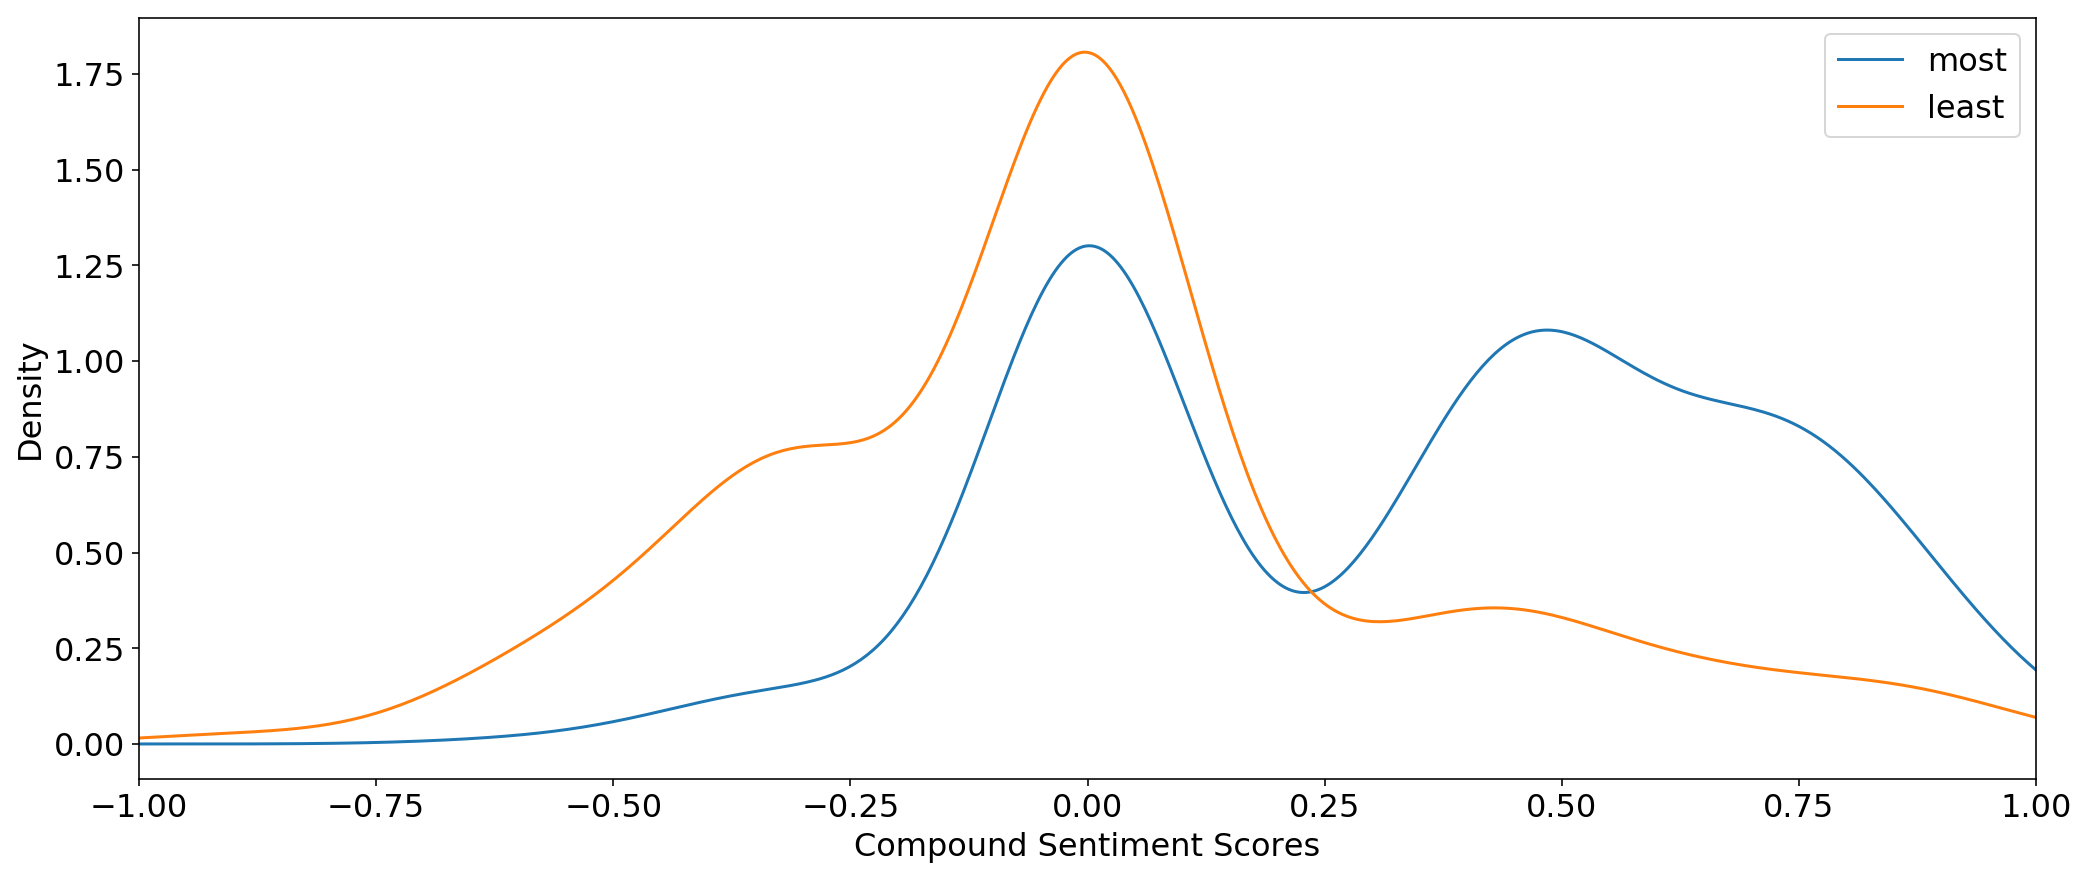

In [74]:
most_sentiments['compound'].plot.density(label='most')
least_sentiments['compound'].plot.density(label='least')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

In [75]:
# include label for boxplot
most_sentiments['which'] = 'most'
least_sentiments['which'] = 'least'
# concatenate data frames together
compound_out = pd.concat([most_sentiments, least_sentiments])

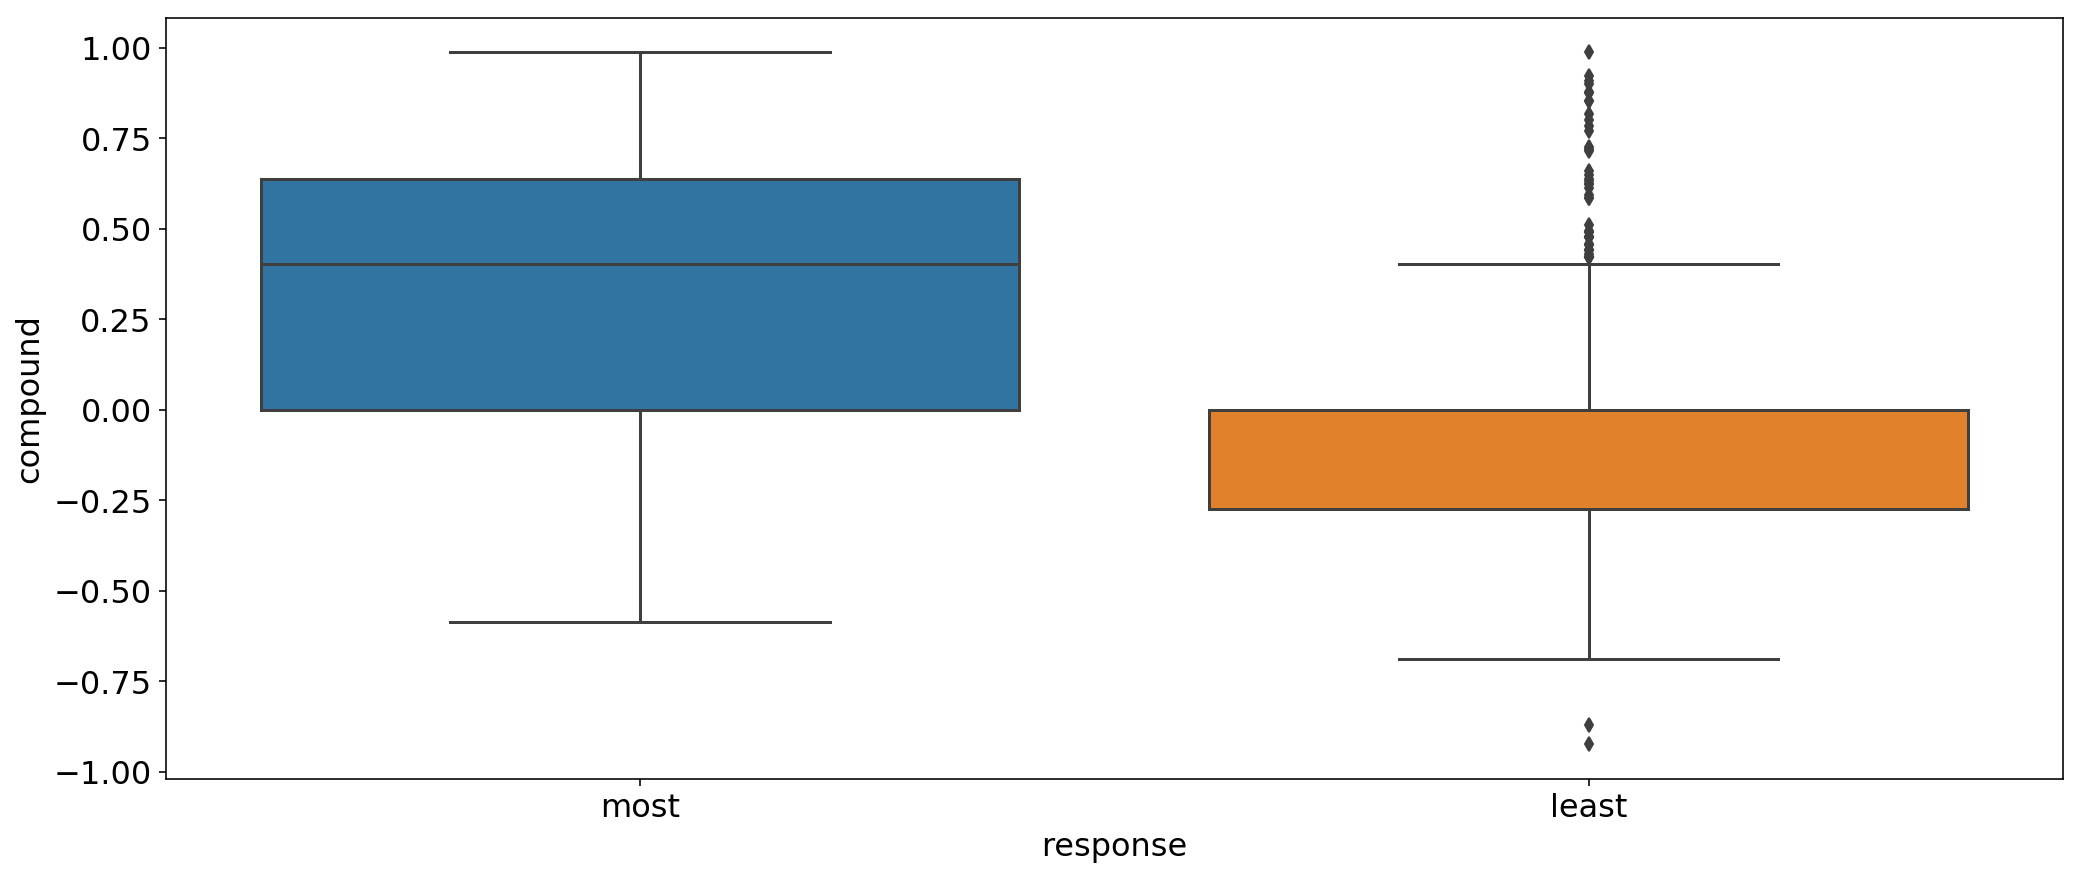

In [76]:
# plot compound by resonse type
sns.boxplot(data = compound_out, x = 'which', y = 'compound')
plt.xlabel('response');

Probably unsurprisingly, the overall sentiment of what students like tends to be more positive than what students like less. 

Probably not surprising given the data and question on the survey. But, let's dig deeper into these data moving beyond sentiment analysis...

## TF-IDF

Term Frequency - Inverse Document Frequency (**TF-IDF**) sets out to identify the tokens most unique to your document of interest (relative to all documents in your corpus). 

**Term Frequency (TF)** - counts the number of words (tokens) occurring in each document.

**Inverse Document Frequency (IDF)** - weights the word by their relative frequency across documents. 

$$IDF_{word} = log(\frac{\# documents}{\# \ documents\_containing\_word})$$

$$TF-IDF = TF \times IDF$$

words with a high TF-IDF are those with high frequency in one document & relatively low frequency in other documents

For our purposes, our **corpus** will be students' responses to what they like most and least about COGS108.

We'll treat this as **two separate documents**:
1. What students like most
2. What students like least

# Clicker Question

**Hypothesis Generation**

What do you think is the word most unique to the question "What have you enjoyed MOST about COGS108 so far?" 

- A) enjoyed
- B) assignments
- C) group
- D) response
- E) fast

# Clicker Question

**Hypothesis Generation**


What do you think is the word most unique to the question "What have you enjoyed LEAST about COGS108 so far?" 

- A) enjoyed
- B) assignments
- C) group
- D) response
- E) fast

### Bag of Words (BoW) approach

Converts the text into a co-occurrence matrix across documents within the corpus.

To do this, let's get our text ready.

We're going to make sure all our words are lower case, remove punctuation from each, and then provide the text (`corpus`) to `TfidfVectorizer`.

In [83]:
import string 

# lowercase text
least = list(map(str.lower, least_list))
most = list(map(str.lower, most_list))

# remove punctuation
for c in string.punctuation:
    least=str(least).replace(c,"")
    most=str(most).replace(c,"")

# get list of two documents together
corpus = [str(least),str(most)]

### Calculate TF-IDF

With our text ready for analysis, it's time to calculate TF-IDF

To start our TF-IDF analysis, we'll first **create a `TfidfVectorizer` object to transform our text data into vectors.**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

#### TF-IDF: COGS108 data - calculation

Here, we use our vectorizer to calculate TF-IDF across the words in our word matrix.

In [84]:
# calculate TF-IDF
cogs_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
cogs_tfidf.columns = tfidf.get_feature_names()
cogs_tfidf.rename(index={0:'least',1:'most'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


#### TF-IDF: COGS108 data - output

If we just want to look at the word most uniuqe in each document...

In [85]:
most_unique = cogs_tfidf.idxmax(axis=1) 
most_unique

least      group
most     enjoyed
dtype: object

Alternatively, we can sort by the set or words most unique to each document:

In [86]:
cogs_tfidf.sort_values(by='most', axis=1, ascending=False)

,enjoyed,assignments,data,python,learning,response,project,like,science,really,...,incorrectly,independent,indifferent,industry,instead,instruction,insufficient,intended,intentions,last
least,0.000000,0.074855,0.064418,0.071324,0.038971,0.087690,0.086175,0.082359,0.048110,0.071324,...,0.038863,0.022953,0.022953,0.022953,0.038863,0.038863,0.022953,0.022953,0.022953,0.022953
most,0.117171,0.103821,0.101885,0.097289,0.095468,0.095147,0.091589,0.089078,0.088161,0.086180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
cogs_tfidf.sort_values(by='least', axis=1, ascending=False)

,group,response,fast,project,like,little,dont,none,lost,assignments,...,programing,discussing,professors,profellis,prof,produce,processing,doable,dr,dataset
least,0.089452,0.087690,0.086592,0.086175,0.082359,0.077992,0.076162,0.075804,0.075804,0.074855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
most,0.076920,0.095147,0.000000,0.091589,0.089078,0.000000,0.018802,0.000000,0.000000,0.103821,...,0.026426,0.026426,0.026426,0.026426,0.044742,0.026426,0.044742,0.026426,0.026426,0.044742


**Sentiment Analysis** and **TF-IDF** are really helpful when analyzing documents and corpuses of text.

But, what if, from the text itself we wanted to predict whether or not the text was likely a 'most' liked or a 'least' liked comment? We'll discuss how to do this in the coming **machine learning** lectures!